In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('AAPL.csv')
df.shape

(3853, 7)

# DATA VISUALIZATION

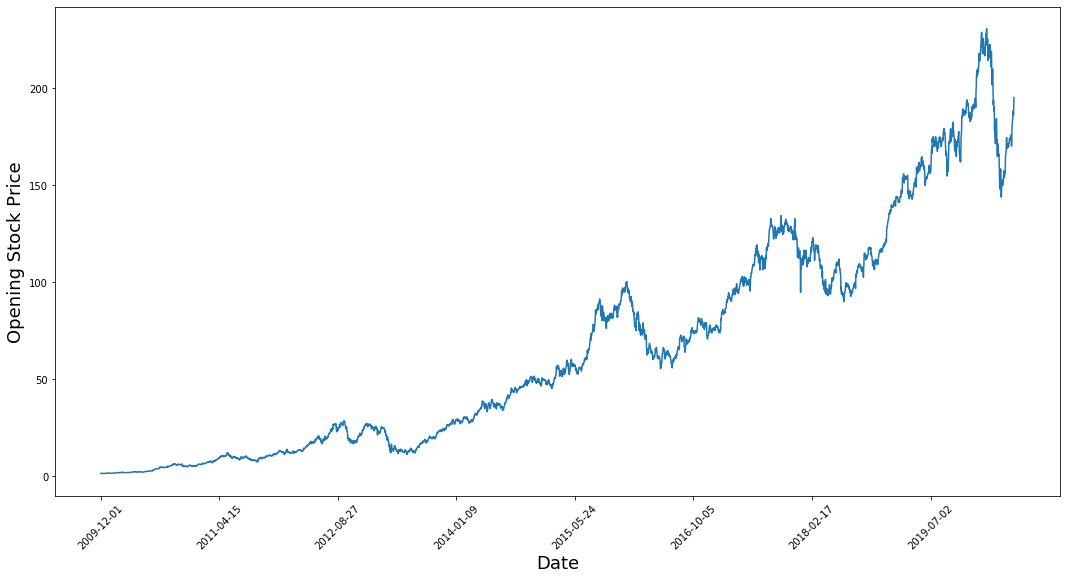

In [3]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Open']))
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Opening Stock Price',fontsize=18)
plt.show()

# PREPARING TRAINING AND TESTING DATA
Splitting given data set

Training Data - (2009-12-01) to (2020-04-30)

Testing Data - (2020-05-01) to (2020-06-18)

In [4]:
df_train = df[0:(len(df)-60)]
df_test = df[(len(df)-60):len(df)]
print(df_train.shape)
print(df_test.shape)

(3793, 7)
(60, 7)


In [5]:
df_train_set = df_train.iloc[:,1:2].values
df_train_set.shape

(3793, 1)

# DATA NORMALIZATION

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

df_train_scaled = scaler.fit_transform(df_train_set)

# TRAINING DATA TO TIMESTEPS

In [7]:
X_train = []
y_train = []
for i in range(1, len(df_train_set)):
    X_train.append(df_train_scaled[i-1:i, 0])
    y_train.append(df_train_scaled[i, 0])

In [8]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# TRAINING LSTM

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [11]:
model = Sequential()

In [12]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 50)             10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

# MODEL COMPILATION

In [14]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
3792/3792 [==============================] - 2s 411us/step - loss: 0.0460
Epoch 2/100
3792/3792 [==============================] - 0s 115us/step - loss: 0.0034
Epoch 3/100
3792/3792 [==============================] - 0s 105us/step - loss: 0.0024
Epoch 4/100
3792/3792 [==============================] - 0s 99us/step - loss: 0.0019
Epoch 5/100
3792/3792 [==============================] - 0s 103us/step - loss: 0.0017
Epoch 6/100
3792/3792 [==============================] - 0s 104us/step - loss: 0.0015 0s - loss: 0
Epoch 7/100
3792/3792 [==============================] - 0s 100us/step - loss: 0.0016
Epoch 8/100
3792/3792 [==============================] - 0s 98us/step - loss: 0.0016
Epoch 9/100
3792/3792 [==============================] - 0s 97us/step - loss: 0.0014
Epoch 10/100
3792/3792 [==============================] - 0s 101us/step - loss: 0.0014
Epoch 11/100
3792/3792 [==============================] - 0s 99us/step - loss: 0.0014
Epoch 12/100
3792/3792 [===================

3792/3792 [==============================] - 1s 132us/step - loss: 9.8581e-04
Epoch 95/100
3792/3792 [==============================] - 0s 128us/step - loss: 9.6719e-04
Epoch 96/100
3792/3792 [==============================] - 0s 125us/step - loss: 9.5651e-04
Epoch 97/100
3792/3792 [==============================] - 0s 129us/step - loss: 9.7153e-04
Epoch 98/100
3792/3792 [==============================] - 0s 127us/step - loss: 9.2313e-04
Epoch 99/100
3792/3792 [==============================] - 0s 126us/step - loss: 9.2646e-04
Epoch 100/100
3792/3792 [==============================] - 0s 126us/step - loss: 9.3843e-04


# TEST DATA TO TIMESTEPS

In [16]:
y_test = df_test.iloc[:,1:2].values
df_total = df['Open']
input_tests = df_total[len(df_total) - len(df_test) - 1:].values
df_total.shape

(3853,)

In [17]:
input_tests.shape

(61,)

In [18]:
input_tests = input_tests.reshape(-1,1)
input_tests = scaler.transform(input_tests)

In [19]:
X_test = []
for i in range(1, len(input_tests)):
    X_test.append(input_tests[i-1:i,0])

In [20]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# MAKING PREDICTIONS

In [21]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

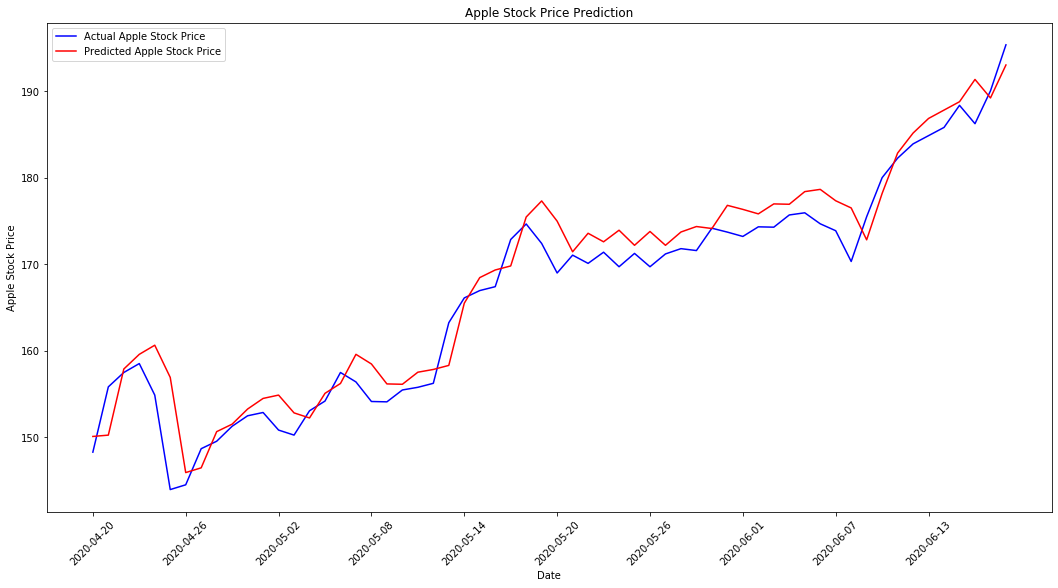

In [22]:
plt.figure(figsize = (18,9))
plt.plot(y_test, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.xticks(range(0,df_test.shape[0],6),df_test['Date'].loc[::6],rotation=45)
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

# OBSERVATION
From the graph, It can be clearly understand that the algorithm can able to represent the overall trend. The model successfully predicted the bearish and bullish trends.  

The above prediction difference graph is obtained from the additional one more LSTM and Drop layer in the sequential model. 
The below prediction difference graph is obtained from the default layers given in the task. 

# 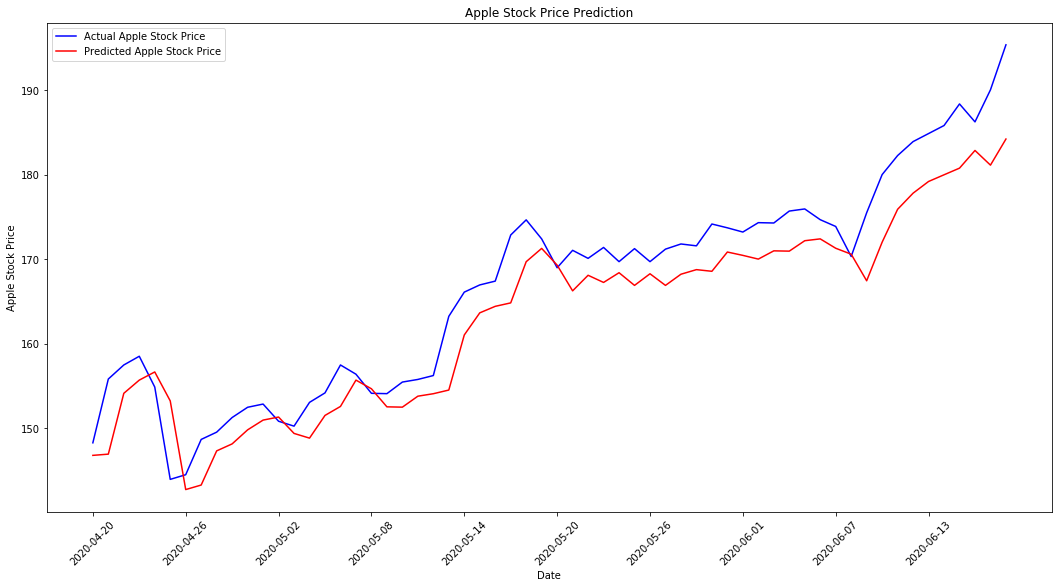